In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load the Data
file_path = '/content/modified_gesture_dataset.csv'  # replace with your CSV file path
data = pd.read_csv(file_path)

data.head()


,time,seconds_elapsed,AccelerationZ,AccelerationY,AccelerationX,GyroscopeZ,GyroscopeY,GyroscopeX,Label
0,1.730000e+18,0.035301,0.060402,0.402841,-0.074089,0.040245,0.197149,0.126307,jumping
1,1.730000e+18,0.045262,0.043124,0.516618,-0.010296,0.001417,0.195964,0.185302,jumping
2,1.730000e+18,0.055223,0.007957,0.675447,0.063820,-0.114407,0.121735,0.272490,jumping
3,1.730000e+18,0.065184,0.338603,1.182504,0.479835,-0.156782,0.048990,0.261387,jumping
4,1.730000e+18,0.075145,0.341335,1.220908,0.696075,-0.151399,0.023366,0.257857,jumping


In [33]:
unique_labels = data['Label'].unique()
print(unique_labels)


# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Step 3: Feature Engineering
# Calculate the magnitude of acceleration and gyroscope readings
data['Magnitude_Acceleration'] = np.sqrt(data['AccelerationX']**2 + data['AccelerationY']**2 + data['AccelerationZ']**2)
data['Magnitude_Gyroscope'] = np.sqrt(data['GyroscopeX']**2 + data['GyroscopeY']**2 + data['GyroscopeZ']**2)

['jumping' 'running' 'squating' 'stretching' 'walking' 'waving' 'dancing']
Missing Values:
 time               0
seconds_elapsed    0
AccelerationZ      0
AccelerationY      0
AccelerationX      0
GyroscopeZ         0
GyroscopeY         0
GyroscopeX         0
Label              0
dtype: int64


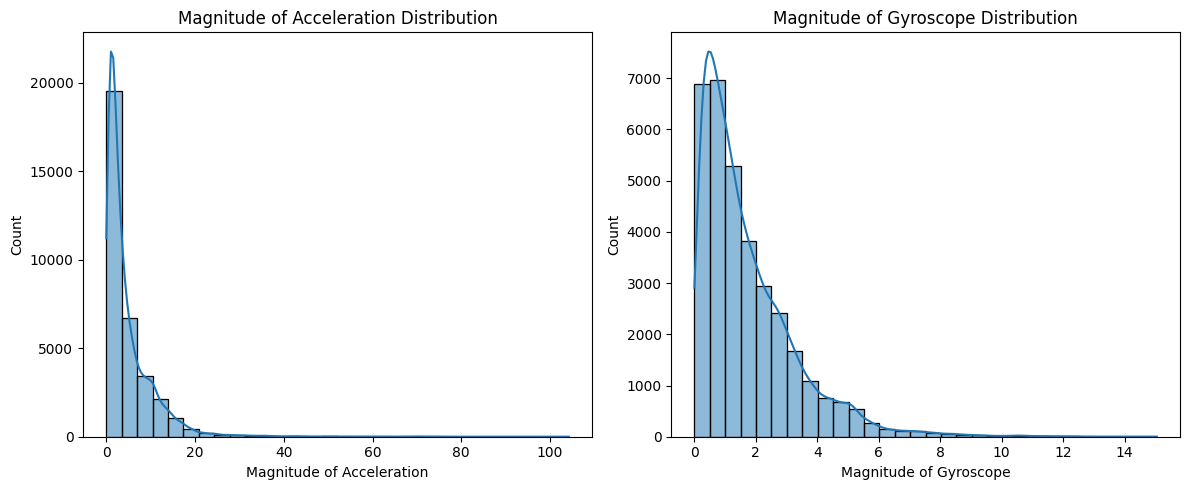

Descriptive Statistics:
                time  seconds_elapsed  AccelerationZ  AccelerationY  \
count  3.399900e+04     33999.000000   33999.000000   33999.000000   
mean   1.730000e+18         2.804196       0.092084       0.094682   
std    7.303787e+05         1.666167       3.293999       5.926037   
min    1.730000e+18         0.011695     -62.861701     -38.150402   
25%    1.730000e+18         1.405558      -0.829928      -1.228997   
50%    1.730000e+18         2.770714       0.106870      -0.062913   
75%    1.730000e+18         4.134101       1.206374       1.098022   
max    1.730000e+18        10.138960      70.599615     102.757059   

       AccelerationX    GyroscopeZ    GyroscopeY    GyroscopeX  \
count   33999.000000  33999.000000  33999.000000  33999.000000   
mean       -0.107122      0.013517      0.018025     -0.017993   
std         3.650237      1.315441      1.518806      1.200389   
min       -51.095635     -7.732634    -13.687306     -9.800842   
25%        -1.

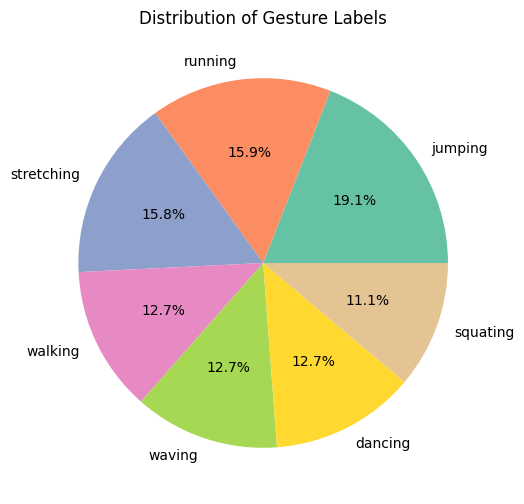

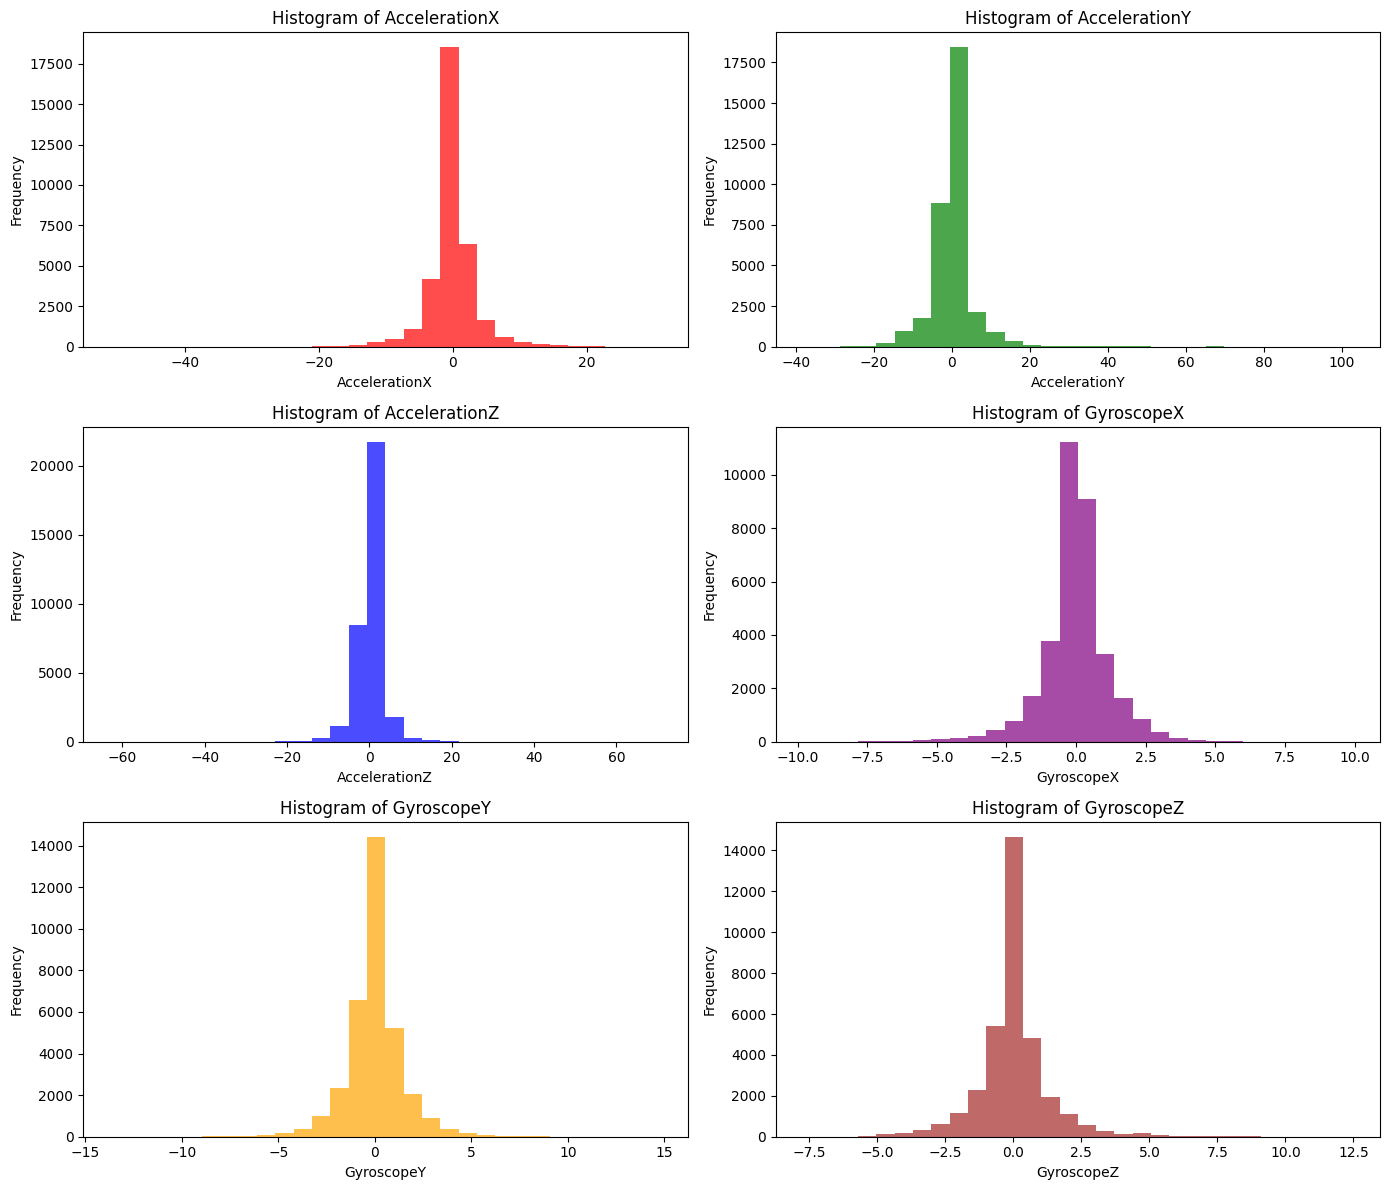

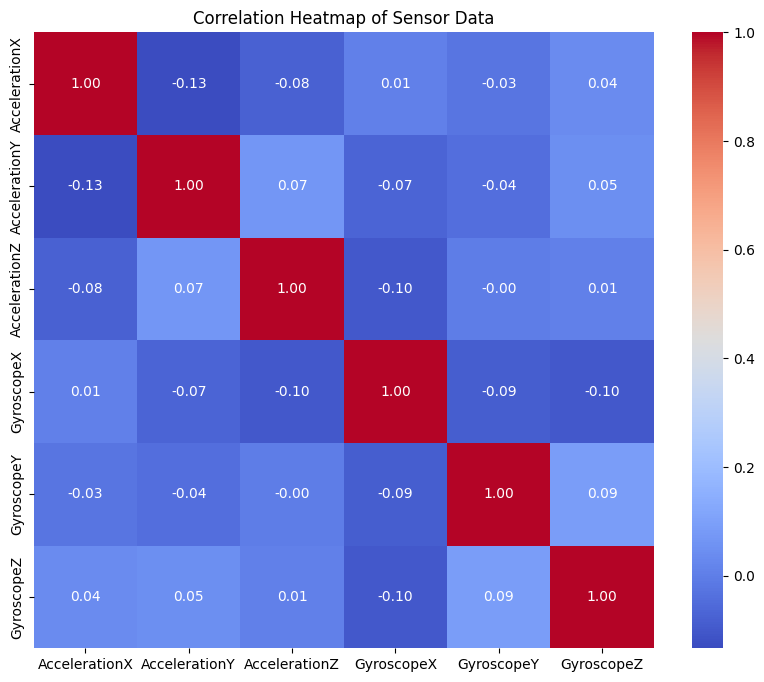

In [36]:
# Step 4: Exploratory Data Analysis (EDA)
# Plot distributions of acceleration and gyroscope magnitudes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Magnitude_Acceleration'], bins=30, kde=True)
plt.title('Magnitude of Acceleration Distribution')
plt.xlabel('Magnitude of Acceleration')

plt.subplot(1, 2, 2)
sns.histplot(data['Magnitude_Gyroscope'], bins=30, kde=True)
plt.title('Magnitude of Gyroscope Distribution')
plt.xlabel('Magnitude of Gyroscope')

plt.tight_layout()
plt.show()

# Step 5: Statistical Analysis
# Descriptive statistics
print("Descriptive Statistics:\n", data.describe())

# Plot 1: Label Distribution
plt.figure(figsize=(8, 6))
data['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Gesture Labels')
plt.ylabel('')
plt.show()

# Set up the subplots for histograms
plt.figure(figsize=(14, 12))

# Histogram for AccelerationX
plt.subplot(3, 2, 1)
plt.hist(data['AccelerationX'], bins=30, color='red', alpha=0.7)
plt.title('Histogram of AccelerationX')
plt.xlabel('AccelerationX')
plt.ylabel('Frequency')

# Histogram for AccelerationY
plt.subplot(3, 2, 2)
plt.hist(data['AccelerationY'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of AccelerationY')
plt.xlabel('AccelerationY')
plt.ylabel('Frequency')

# Histogram for AccelerationZ
plt.subplot(3, 2, 3)
plt.hist(data['AccelerationZ'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of AccelerationZ')
plt.xlabel('AccelerationZ')
plt.ylabel('Frequency')

# Histogram for GyroscopeX
plt.subplot(3, 2, 4)
plt.hist(data['GyroscopeX'], bins=30, color='purple', alpha=0.7)
plt.title('Histogram of GyroscopeX')
plt.xlabel('GyroscopeX')
plt.ylabel('Frequency')

# Histogram for GyroscopeY
plt.subplot(3, 2, 5)
plt.hist(data['GyroscopeY'], bins=30, color='orange', alpha=0.7)
plt.title('Histogram of GyroscopeY')
plt.xlabel('GyroscopeY')
plt.ylabel('Frequency')

# Histogram for GyroscopeZ
plt.subplot(3, 2, 6)
plt.hist(data['GyroscopeZ'], bins=30, color='brown', alpha=0.7)
plt.title('Histogram of GyroscopeZ')
plt.xlabel('GyroscopeZ')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Plot 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['AccelerationX', 'AccelerationY', 'AccelerationZ', 'GyroscopeX', 'GyroscopeY', 'GyroscopeZ']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Sensor Data')
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


765/765 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.3060 - loss: 1.7338 - val_accuracy: 0.4404 - val_loss: 1.4954
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4369 - loss: 1.4906 - val_accuracy: 0.4923 - val_loss: 1.3804
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4947 - loss: 1.3616 - val_accuracy: 0.5379 - val_loss: 1.2445
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5328 - loss: 1.2585 - val_accuracy: 0.5728 - val_loss: 1.1768
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5683 - loss: 1.1734 - val_accuracy: 0.6048 - val_loss: 1.0959
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6056 - loss: 1.0870 - val_accuracy: 0.6390 - val_loss: 1.0096
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6250 - loss: 1.0266 - val_accuracy: 0.6507 - val_loss: 0.9786
Epoch 8/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.6557 - loss: 0.9547 - val_accurac

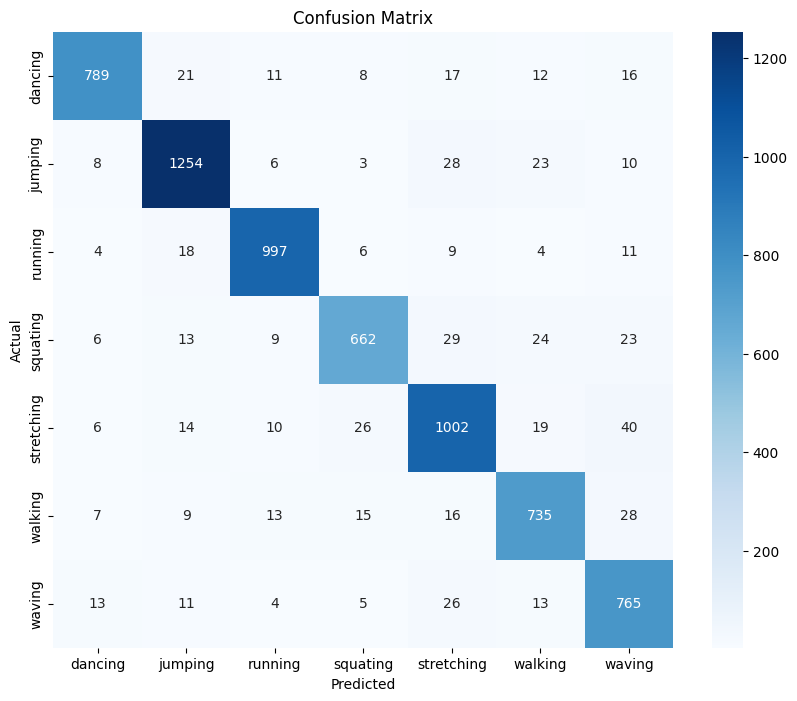

Unique classes in y_test: [0 1 2 3 4 5 6]
              precision    recall  f1-score   support

     dancing       0.95      0.90      0.92       874
     jumping       0.94      0.94      0.94      1332
     running       0.95      0.95      0.95      1049
    squating       0.91      0.86      0.89       766
  stretching       0.89      0.90      0.89      1117
     walking       0.89      0.89      0.89       823
      waving       0.86      0.91      0.88       837

    accuracy                           0.91      6798
   macro avg       0.91      0.91      0.91      6798
weighted avg       0.91      0.91      0.91      6798



In [37]:
# Preprocessing
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Define features and labels
features = data[['AccelerationX', 'AccelerationY', 'AccelerationZ', 'GyroscopeX', 'GyroscopeY', 'GyroscopeZ']]
labels = data['Label']

# Convert to numpy arrays
features = features.values
labels = labels.values

# Create sequences for LSTM input
def create_sequences(features, labels, time_steps=10):
    sequences = []
    target = []
    for i in range(len(features) - time_steps):
        seq = features[i:i + time_steps]
        label = labels[i + time_steps]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

# Define time steps
time_steps = 10
X, y = create_sequences(features, labels, time_steps)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


 Evaluate the Model
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Check unique classes in the predictions
unique_classes = np.unique(y_test)
print(f'Unique classes in y_test: {unique_classes}')

# Classification Report
print(classification_report(y_test, y_pred, labels=unique_classes, target_names=label_encoder.inverse_transform(unique_classes)))
